In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Score Distributions (Figure 3)

### Preprocessing

In [3]:
result=pickle.load(open("./jee-pickles/jeeresult.pickle", "rb"))

In [4]:
jee_result = pd.DataFrame(result)
jee_result['math'] = pd.to_numeric(jee_result['math'])
jee_result['phys'] = pd.to_numeric(jee_result['phys'])
jee_result['chem'] = pd.to_numeric(jee_result['chem'])
jee_result['mark'] = pd.to_numeric(jee_result['mark'])

In [18]:
jee_sorted = jee_result.sort_values(by = 'mark', ascending = False)
jee_sorted = jee_sorted.head(1000)
top_1000_cat = jee_sorted['category'].tolist()
# print(top_1000_cat)

frequency_table = pd.Series(top_1000_cat).value_counts()
print(frequency_table)
print(len(top_1000_cat))


# TOP 1000
## GE    876
## ON     99
## OC     13
## SC      9
## ST      3

# TOP 5000
## GE    4178
## ON     692
## OC      88
## SC      34
## ST       8

# ALL RESULTS (384977)
## GE    232334
## ON     88932
## SC     36117
## OC     15109
## ST     12484
## OB         1


# TOP 7000 (GENDER)
## M    6300
## F     700

# ALL RESULTS (GENDER)
## M    286942
## F     98028
##           7


GE    876
ON     99
OC     13
SC      9
ST      3
Name: count, dtype: int64
1000


### Figure 3a: Gender

In [43]:
subject_score_male = list(jee_result['mark'][jee_result['GENDER'] == 'M'])
subject_score_female = list(jee_result['mark'][jee_result['GENDER'] == 'F'])

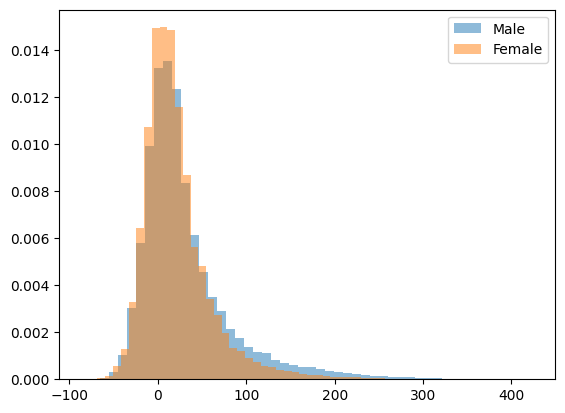

In [47]:
plt.figure().clear() 

plt.hist(subject_score_male, alpha=0.5, bins=50, density=True, label='Male')
plt.hist(subject_score_female, alpha=0.5, bins=50, density=True, label='Female')

plt.legend()
plt.show()

### Figure 3b: Birth Category

In [45]:
subject_score_general = list(jee_result['mark'][jee_result['category'] == 'GE'])
subject_score_not_general = list(jee_result['mark'][jee_result['category'] != 'GE'])

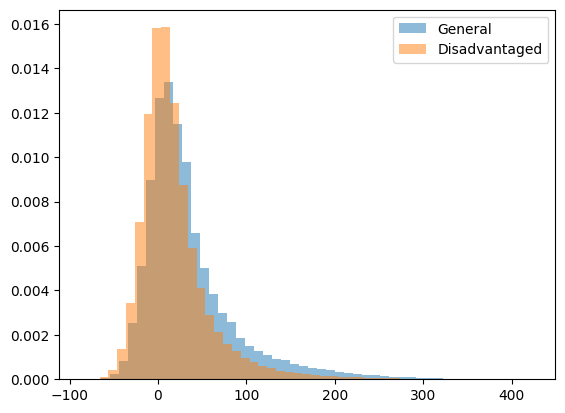

In [48]:
plt.figure().clear() 

plt.hist(subject_score_general, alpha=0.5, bins=50, density=True, label='General')
plt.hist(subject_score_not_general, alpha=0.5, bins=50, density=True, label='Disadvantaged')

plt.legend()
plt.show()

## Top Major-Institution Pairs (Figure 4)

<Figure size 640x480 with 0 Axes>

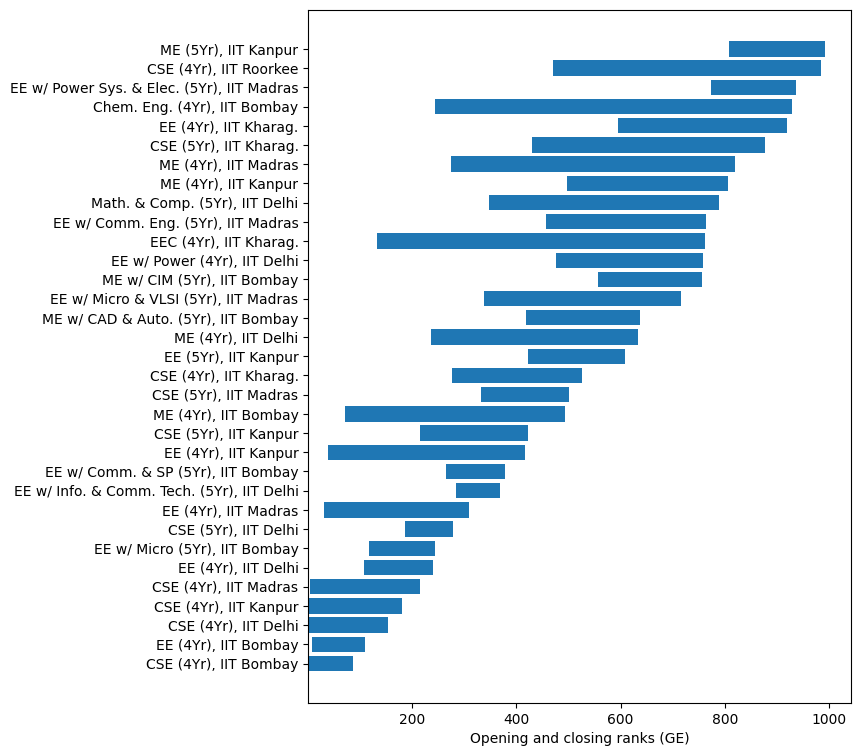

In [49]:
jee_preferences = pd.read_excel("IIT-JEE-2009.xlsx", sheet_name="updated_1000")
jee_preferences['Pair'] = jee_preferences.apply(lambda row: f"{row['Major']}, {row['Institute']}", axis = 1)

# Opening and closing ranks for each institute and major
pairs = list(jee_preferences['Pair'])

opening_ranks = list(jee_preferences['ge_opening'])
closing_ranks = list(jee_preferences['ge_closing'])
width = [close - open for close, open in zip(closing_ranks, opening_ranks)]

plt.figure().clear()

# Create a bar graph with horizontal bars
plt.figure(figsize = (7,9))
plt.barh(pairs, width, left=opening_ranks)

# Set a fixed range for the x-axis
# plt.xlim(0, 1000)  # Adjust the range as needed

# Add labels and legend
plt.xlabel('Opening and closing ranks (GE)')
#ax.set_ylabel('Institutes')
#ax.set_title('Opening and Closing Ranks for Institutes')
#ax.legend()

# Show the plot
plt.show()